In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPooling2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from skimage import color

#img = color.rgb2gray(io.imread('image.png'))

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')

    plt.show()

Funcion para convertir las imagenes a escala de grises:


```
color.rgb2gray( <image> )
```



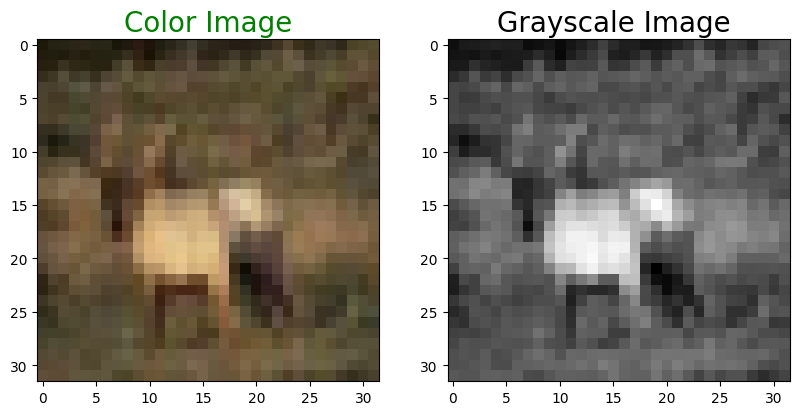

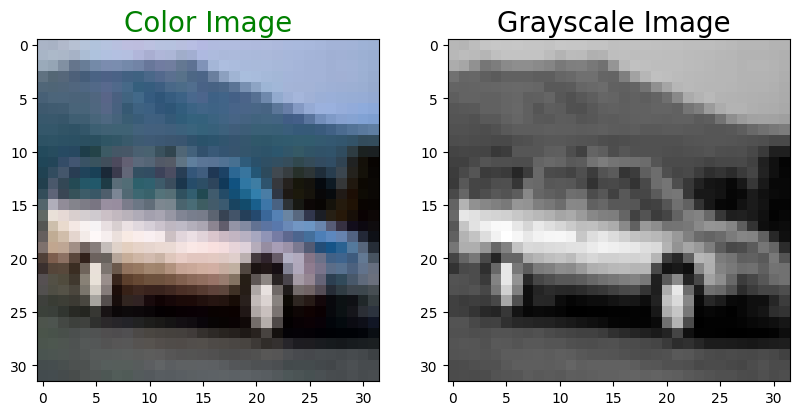

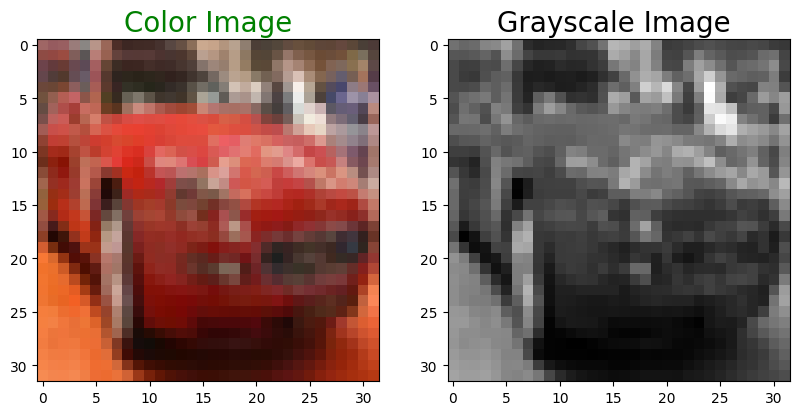

In [5]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

## Enunciado de la práctica 1

Para esta práctica hemos creido necesario que se debe poner en práctica todo lo impartido hasta la fecha, es decir, no solo las arquitecturas impartidad sino tambien las diferentes tipologías de redes mostrada hasta el momento.

Para ello, mediante el dataset anterior queremos implementar un modelo capaz de frente a una entrada de imagenes en blanco y negro, sea capaz de colorearlas. De esta manera se establecen los siguiente puntos:


1.   Implementar la arquitectura mediante redes MLP
2.   Implementar la arquitectura mediante redes Convolucionales
3.   (Opcional) Probar diferentes arquitecturas CNN que puedan mejorar lo resultados.



###Ejercicio1

In [42]:
grey_xtrain= color.rgb2gray(x_train)
grey_xtest= color.rgb2gray(x_test)
# normalizamos las entradas de 0-255 a 0-1
grey_xtrain= grey_xtrain/255
grey_xtest= grey_xtest/255

#Ahora las dimensiones que tenemos de "grey_xtrain" son (50000, 32, 32), vamos a aplanarlas para tener (50000, 32x32)=(50000, 1024)
grey_xtrain1=grey_xtrain.reshape((50000, 1024)).astype('float32')
grey_xtest1=grey_xtest.reshape((10000, 1024)).astype('float32')

grey_xtrain1.shape

(50000, 1024)

In [43]:
#Aplanamos el "y_train" y el "y_test"
y_train1= y_train.reshape(-1)
y_test1=y_test.reshape(-1)

y_train1=to_categorical(y_train1)
y_test1=to_categorical(y_test1)

In [44]:
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Crear el modelo
model = Sequential()

# Capas densas
model.add(Dense(1024, input_shape=(1024,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [45]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history=model.fit(grey_xtrain1, y_train1, validation_data=(grey_xtest1, y_test1), epochs=50, batch_size=100)

Epoch 1/50
500/500 [==============================] - 5s 6ms/step - loss: 2.1328 - accuracy: 0.2003 - val_loss: 2.0670 - val_accuracy: 0.2381
Epoch 2/50
500/500 [==============================] - 2s 5ms/step - loss: 2.0310 - accuracy: 0.2570 - val_loss: 1.9764 - val_accuracy: 0.2844
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 1.9615 - accuracy: 0.2877 - val_loss: 1.9462 - val_accuracy: 0.2949
Epoch 4/50
500/500 [==============================] - 2s 5ms/step - loss: 1.9191 - accuracy: 0.3068 - val_loss: 1.9043 - val_accuracy: 0.3132
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 1.8835 - accuracy: 0.3223 - val_loss: 1.8675 - val_accuracy: 0.3291
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 1.8597 - accuracy: 0.3305 - val_loss: 1.8437 - val_accuracy: 0.3424
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 1.8339 - accuracy: 0.3407 - val_loss: 1.8212 - val_accuracy: 0.3491
Epoch 

#Gráficas de análisis
Las hacemos para ver si tenemos overfitting o underfitting

In [47]:
history_dict = history.history

In [48]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

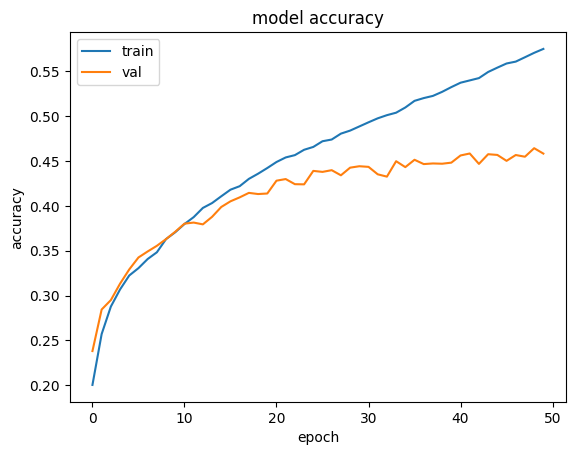

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

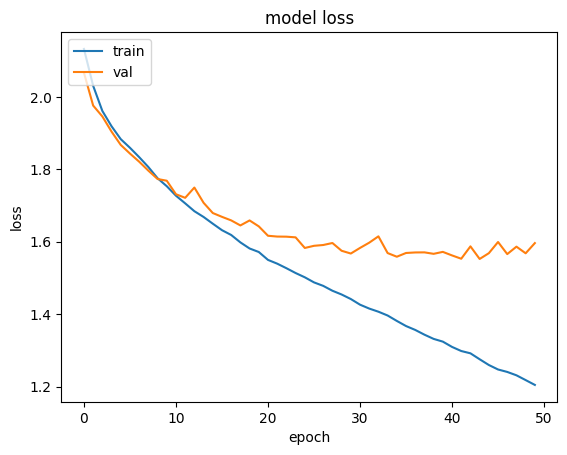

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
# evaluación final del modelo
scores = model.evaluate(grey_xtest1, y_test1, verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 45.82%


###Ejercicio 2

In [52]:
#Preparamos los datos para la red
ytrain_cat=to_categorical(y_train)
ytest_cat=to_categorical(y_test)

grey_xtrain=np.expand_dims(grey_xtrain, -1)
grey_xtest=np.expand_dims(grey_xtest, -1)

grey_xtrain.shape

(50000, 32, 32, 1)

In [ ]:
def create_model():
  # creamos el modelo
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu', padding='same')) #Ponemos "padding='same'" para que no se vaya reduciendo el tamaño de la matriz sino que añadiendo ceros alrededor, tenfa el mismo tamaño.
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
  model.add(MaxPooling2D((5, 5)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  # Compilamos el modelo
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       102528    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_47 (Dense)            (None, 128)             

In [ ]:
# entrenamos el modelo
history=model.fit(grey_xtrain, ytrain_cat, validation_data=(grey_xtest, ytest_cat), epochs=80, batch_size=200)

Epoch 1/80
250/250 [==============================] - 4s 11ms/step - loss: 0.3427 - accuracy: 0.0991 - val_loss: 0.3256 - val_accuracy: 0.1000
Epoch 2/80
250/250 [==============================] - 3s 10ms/step - loss: 0.3256 - accuracy: 0.1016 - val_loss: 0.3256 - val_accuracy: 0.1000
Epoch 3/80
250/250 [==============================] - 3s 12ms/step - loss: 0.3254 - accuracy: 0.1016 - val_loss: 0.3252 - val_accuracy: 0.1000
Epoch 4/80
250/250 [==============================] - 3s 11ms/step - loss: 0.3251 - accuracy: 0.1076 - val_loss: 0.3240 - val_accuracy: 0.1266
Epoch 5/80
250/250 [==============================] - 3s 10ms/step - loss: 0.3109 - accuracy: 0.2058 - val_loss: 0.3031 - val_accuracy: 0.2419
Epoch 6/80
250/250 [==============================] - 2s 10ms/step - loss: 0.2933 - accuracy: 0.2766 - val_loss: 0.2825 - val_accuracy: 0.3141
Epoch 7/80
250/250 [==============================] - 3s 10ms/step - loss: 0.2774 - accuracy: 0.3277 - val_loss: 0.2721 - val_accuracy: 0.3413

# Vamos a ver las graficas de entrenamiento

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

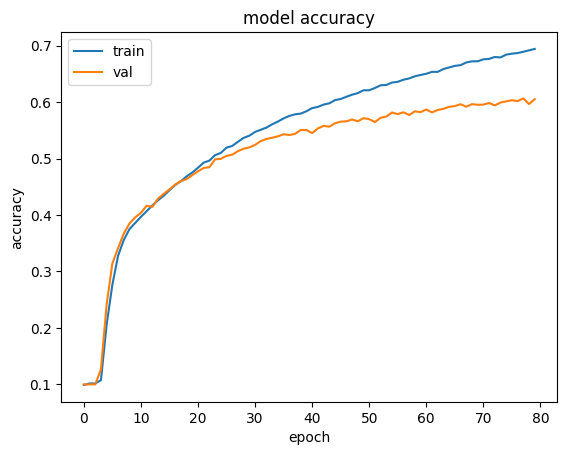

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

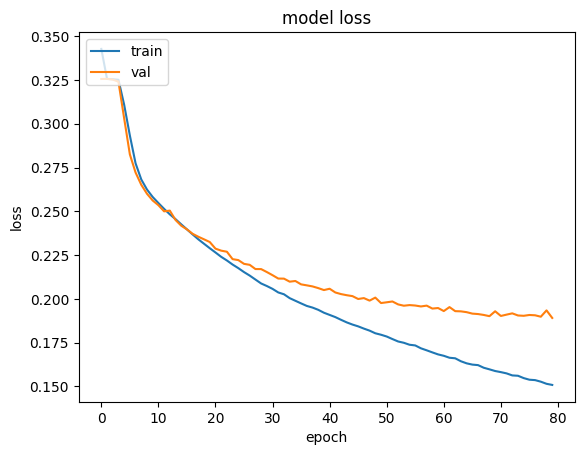

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# evaluación final del modelo
scores = model.evaluate(grey_xtest, ytest_cat, verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 60.51%


###Ejercicio 3

VGG16 sería otra arquitectura CNN pero que he comprobado que para este ejercicio no serviría porque esta arquitectura implic 3 canales y en este ejercicio queremos 1 porque queremos imágenes en blanco y negro

In [54]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [55]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [56]:
conv_base.trainable = False

In [57]:
from keras import models
from keras import layers

#Así se crearía el modelo
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               65664     
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14781642 (56.39 MB)
Trainable params: 66954 (261.54 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# entrenamos el modelo
#history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=200)